#### 2. hét: Átlag, percentillis, ECDF, boxplot

Átlag, percentillis, ECDF, boxplot

In [1]:
# From the previous lesson:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
from sklearn import datasets
iris=pd.read_csv('.\HET2\iris.csv')
sepal_length=iris['sepal_length']
species=[]
for s in iris['species']:
    if s not in species:
        species.append(s)
setosa_petal_length=[]
versicolor_petal_length=[]
virginica_petal_length=[]
c=-1
for s in iris['species']:
    c+=1
    if s=='Iris-setosa':
        setosa_petal_length.append(iris['petal_length'][c])
    if s=='Iris-versicolor':
        versicolor_petal_length.append(iris['petal_length'][c])
    if s=='Iris-virginica':
        virginica_petal_length.append(iris['petal_length'][c])

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n

    return x, y
        
x_set, y_set=ecdf(setosa_petal_length)
x_vers, y_vers=ecdf(versicolor_petal_length)
x_virg, y_virg=ecdf(virginica_petal_length)

Átlag: 4.26
Percentilisek: [3.3    4.     4.35   4.6    4.9775]
Sima plt plottolás:


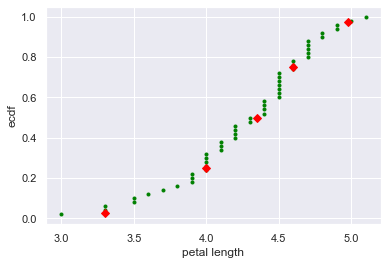

Boxplot plottolás:


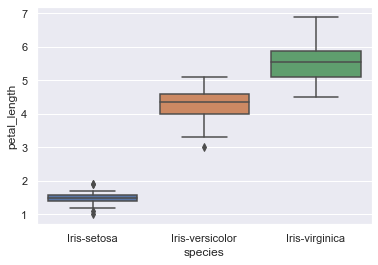

In [2]:
# Átlag
mean_length_vers = np.mean(versicolor_petal_length)
print('Átlag:',mean_length_vers)
# percentilis: 1. param: adattömb, 2. param: percentilis tömb
percentiles = [2.5, 25, 50, 75, 97.5]
percentilesResult = np.percentile(versicolor_petal_length, percentiles) 
print('Percentilisek:',percentilesResult)
# Sima plt plottolás
plt.plot(x_vers, y_vers, marker='.', color='green', linestyle='none') #1. param: X, 2. param: Y
plt.plot(percentilesResult, np.array(percentiles) / 100, marker='D', color='red', linestyle='none')
plt.xlabel('petal length')
plt.ylabel('ecdf')
print('Sima plt plottolás:')
plt.show()
# Boxplot plottolás: 1. param: dataset egyik oszlopa, 2. param: dataset másik oszlopa, 3. param: A dataset
print('Boxplot plottolás:')
sns.boxplot(x='species',y='petal_length',data=iris)
plt.show()

variancia, scatterplot, kovariancia, random, histogram, bernoulli

Variancia: 0.21640000000000004


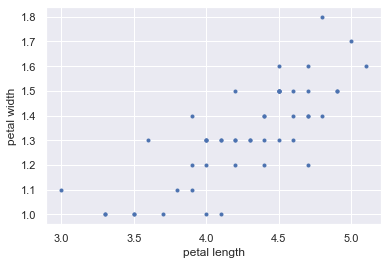

Kovariancia: [[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
Random számok histogramja:


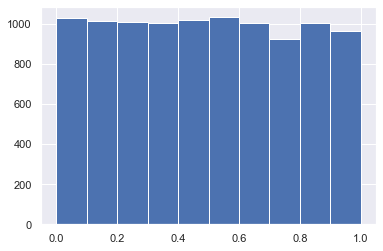

In [4]:
# Variancia
variance = np.var(versicolor_petal_length)
print("Variancia:",variance)

# Scatterplot: versicolor_petal_width csak kellett a scatterhez
versicolor_petal_width = []
for i in range(len(iris['species'])):
    if iris['species'][i] == 'Iris-versicolor':
        versicolor_petal_width.append(iris['petal_width'][i])

# sns.scatterplot(x=versicolor_petal_length, y=versicolor_petal_width, marker='.')
plt.scatter(versicolor_petal_length, versicolor_petal_width, marker='.')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

# Kovariancia: Lehet 1 tömbbel is, csak akkor nem lesz mátrix kimenet
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)
print('Kovariancia:',covariance_matrix)

# Random számok és histogram
np.random.seed(42) # Csak adj be ide valami random számot, ezzel változtatjuk a randomot
random_numbers = np.empty(10000)

for i in range(len(random_numbers)):
    random_numbers[i] = np.random.random() # 0 és 1 közötti float szám

plt.hist(random_numbers, bins=10)
print('Random számok histogramja:')
plt.show()

# Bernoulli

#### 3. hét: Dataframe, JSON

Dataframe

In [5]:
dict = { "country": ["Brazil", "Russia", "India", "China", "South Africa"],
       "capital": ["Brasilia", "Moscow", "New Dehli", "Beijing", "Pretoria"],
       "area": [8.516, 17.10, 3.286, 9.597, 1.221],
       "population": [200.4, 143.5, 1252, 1357, 52.98] }

import pandas as pd
brics = pd.DataFrame(dict)
brics

,country,capital,area,population
0,Brazil,Brasilia,8.516,200.40
1,Russia,Moscow,17.100,143.50
2,India,New Dehli,3.286,1252.00
3,China,Beijing,9.597,1357.00
4,South Africa,Pretoria,1.221,52.98


In [6]:
# Dataframe indexeinek beállítása
brics.index = ['BR', 'RU', 'IN', 'CH', 'SA']
brics.head()

# csv fájl beolvasása
import json
import urllib
cars = pd.read_csv('.\HET3\cars.csv') # Helyileg
url = urllib.request.urlopen('http://worldcup.sfg.io/matches') # url-ből, sep=';' melléje paraméternek
data = url.read().decode('utf-8') # url-ből beolvasás

Egyéb dataframe mókolgatások

In [6]:
# Oszlopnév változtatása
cars = cars.rename(columns={'Unnamed: 0':'country_code'})

# Indexelési módszerek
cars = pd.read_csv('.\HET3\cars.csv', index_col=0) # Csak a 0. oszlop beolvasása
print(cars['country']) # Pandas Series adott oszlop kiírása
print(cars[['country']]) # Pandas Dataframe adott oszlop kiírása
print(cars[['country', 'drives_right']]) # Pandas Dataframe adott oszlopainak kiírása
print(cars[0:4]) # Első 4 sor
print(cars[4:6]) # 4.-től 6. sor
print(cars.iloc[[2]]) # 2. sor
print(cars.iloc[[2,4,6]]) # 2. 4. 6.
print(cars.loc[['AUS', 'JAP']]) # AUS és JAP sorindexű

US     United States
AUS        Australia
JAP            Japan
IN             India
RU            Russia
MOR          Morocco
EG             Egypt
Name: country, dtype: object
           country
US   United States
AUS      Australia
JAP          Japan
IN           India
RU          Russia
MOR        Morocco
EG           Egypt
           country  drives_right
US   United States          True
AUS      Australia         False
JAP          Japan         False
IN           India         False
RU          Russia          True
MOR        Morocco          True
EG           Egypt          True
     cars_per_cap        country  drives_right
US            809  United States          True
AUS           731      Australia         False
JAP           588          Japan         False
IN             18          India         False
     cars_per_cap  country  drives_right
RU            200   Russia          True
MOR            70  Morocco          True
     cars_per_cap country  drives_right
JAP       

JSON, 

In [7]:
# Json változóba tétel
vb = json.loads(data)
print(vb[0])

# country1 - country2 goal1:goal2 (e.g.: England - Panama 6:1) formátum
for i in range(len(vb)):
    print(vb[i]['home_team']['country'], '-', vb[i]['away_team']['country'], vb[i]['home_team']['goals'], ':', vb[i]['away_team']['goals'])
    

{'venue': 'Paris', 'location': 'Parc des Princes', 'status': 'completed', 'time': 'full-time', 'fifa_id': '300438238', 'weather': {'humidity': '78', 'temp_celsius': '15', 'temp_farenheit': '47', 'wind_speed': '32', 'description': 'Cloudy'}, 'attendance': '45261', 'officials': ['Claudia UMPIERREZ', 'Luciana MASCARANA', 'Monica AMBOYA', 'Melissa BORJAS', 'Mauro VIGLIANO', 'Felisha MARISCAL', 'Jose Maria SANCHEZ', 'Mariana DE ALMEIDA'], 'stage_name': 'First Stage', 'home_team_country': 'France', 'away_team_country': 'Korea Republic', 'datetime': '2019-06-07T19:00:00Z', 'winner': 'France', 'winner_code': 'FRA', 'home_team': {'country': 'France', 'code': 'FRA', 'goals': 4, 'penalties': 0}, 'away_team': {'country': 'Korea Republic', 'code': 'KOR', 'goals': 0, 'penalties': 0}, 'home_team_events': [{'id': 1, 'type_of_event': 'goal', 'player': 'Eugenie LE SOMMER', 'time': "9'"}, {'id': 2, 'type_of_event': 'goal', 'player': 'Griedge MBOCK BATHY', 'time': "27'"}, {'id': 3, 'type_of_event': 'goal'

In [15]:
# Kell majd a többi jegyzethez
table = pd.DataFrame(vb)
smalltable = table[['fifa_id', 'location', 'datetime', 'home_team_country', 'away_team_country', 'winner', 'home_team_statistics', 'away_team_statistics']]

0    [2019-06-07, 19:00:00Z]
1    [2019-06-08, 13:00:00Z]
Name: datetime, dtype: object
location
Parc des Princes    7
Roazhon Park        7
Name: fifa_id, dtype: int64


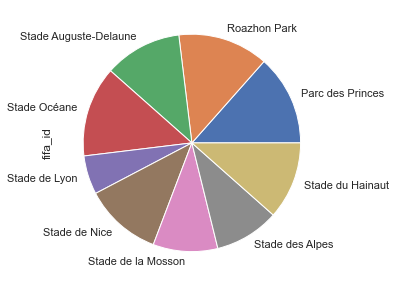

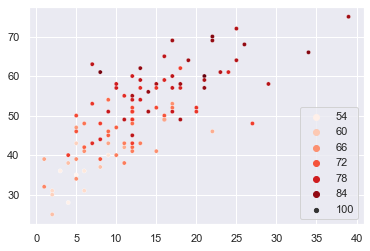

In [16]:
# Dátum felsplittelés
date = smalltable['datetime'].str.split('T') # ['datetime'] és ne [['datetime']]
print(date[:2])

# Meccsek száma (groupby, count és pie chart)
import matplotlib.pyplot as plt
matchesInEachStadion = smalltable.groupby(['location']).count()['fifa_id']
print(matchesInEachStadion[:2])
matchesInEachStadion.plot.pie(y='location', figsize=(5,5))
plt.show()

# Labdatartás, lövés, pontosság plottolása
from matplotlib import cm # Színek
import seaborn as sns

possession = []
attempts = []
accuracy = []

for i in range(len(smalltable)):
    possession.append(smalltable['home_team_statistics'][i]['ball_possession'])
    possession.append(smalltable['away_team_statistics'][i]['ball_possession'])
    attempts.append(smalltable['home_team_statistics'][i]['attempts_on_goal'])
    attempts.append(smalltable['away_team_statistics'][i]['attempts_on_goal'])
    accuracy.append(smalltable['home_team_statistics'][i]['pass_accuracy'])
    accuracy.append(smalltable['away_team_statistics'][i]['pass_accuracy'])

sns.scatterplot(x=attempts, y=possession, hue=accuracy, palette=cm.Reds, size=100) # plt.scatter-nek nincs hue-ja elv
plt.show()

#### 4. hét: Supervised Learning, KNN

KNeighborsClassifer

Tömb sorainak száma: 150
Pontosság: 0.9666666666666667
K. szomszédok: [0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333]


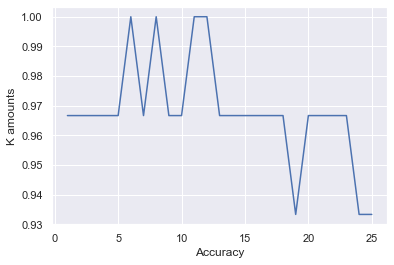

In [17]:
# Kell a jegyzethez
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
housing = pd.read_csv(".\HET4\housing.csv") # pd.read_csv Dataframe-é alakítja
housing.head()

# label, Y, avagy az érték amiket kiszeretnénk majd számítani
# y= housing.median_income 
y = iris.target

# features, X, avagy az adatok amikkel kiszámoljuk az Y-t
# x=housing.drop('median_income',axis=1)
X = iris.data

# Tanuló és teszt adatok létrehozása
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

print('Tömb sorainak száma:',len(iris['data']))

#KNN betanítása és értékelése
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=1) # KNN 1 szomszéddal való dolgozása
knn.fit(X_train, y_train) # Betanítás
y_pred = knn.predict(X_test) # Predictelés
print('Pontosság:',accuracy_score(y_test, y_pred)) # Pontosság meghatározás

# KNN több szomszéddal való tesztelése
scores = []

for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

print('K. szomszédok:',scores)

# Eredmény plottolása. Ez azért kell, hogy a legjobb szomszédszámot megkeressük
import matplotlib.pyplot as plt
plt.plot(range(1,26), scores)
plt.xlabel('Accuracy')
plt.ylabel('K amounts')
plt.show()

KNN a digits dataseten

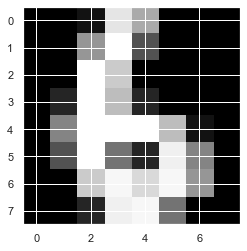

Predictelt: [6]
Valós: 6
Pontosság: 0.934010152284264


In [18]:
from sklearn.datasets import *
import pandas as pd
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

digit = load_digits()
def Image_display(i):
    plt.imshow(digit['images'][i],cmap = 'Greys_r')
    plt.show()

train_x = digit['data'][:1600]
train_y = digit['target'][:1600]
test_x = digit['data'][1600:]
test_y = digit['target'][1600:]
KNN = KNeighborsClassifier(20)
KNN.fit(train_x,train_y)

test = np.array(digit['data'][1725])
test1 = test.reshape(1,-1) # -1 refers to finding the correct size 
Image_display(1725)

print('Predictelt:',KNN.predict(test1))
print('Valós:',digit.target[1725])
# print(digit['target'][1725])

y_pred=KNN.predict(test_x)
from sklearn.metrics import accuracy_score

print('Pontosság:',accuracy_score(test_y, y_pred)) # normalize=False ha nem akarsz százalékost

Cross-validation

Cross validation fit eredmények: [0.3394467434406937, 0.23874192313322745, 0.30236664276231584, 0.203775668841139, 0.2833185994880275, 0.1961707418263448, 0.22350183346285296, 0.14835920667760039, 0.18457261725076704, 0.07847601295877157, 0.13562205910031996, 0.1217522252304861, 0.12396630744456831, 0.09456193717812908, 0.10289527051146241, 0.08439153439153439, 0.09540740740740741, 0.0587949636981895, 0.07811443773062962, 0.05780798771121352, 0.05638494838494838, 0.0456657824933687, 0.05260545905707196, 0.039476190476190484, 0.04576923076923077, 0.01610305958132045, 0.0327536231884058, 0.015838509316770187, 0.03959220389805098, 0.03269565217391305, 0.03269565217391305, 0.03269565217391305, 0.03269565217391305, 0.008695652173913045, 0.025362318840579712, 0.01666666666666667, 0.01666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


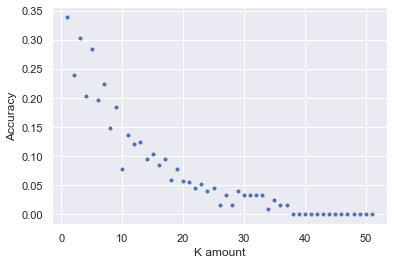

Legjobb K szám: 0.3394467434406937


In [19]:
# Kell a jegyzethez
import pandas as pd
import numpy as np

redwine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

# Dataframe átalakítása np.array-ba
wine_data = redwine.values

# np.array átalakítás float-ba, illetve a target számok binárissá
wine_data = wine_data.astype(float)
for i in wine_data:
    if i[11] < 6.5:
        i[11]=0
    else:
        i[11]=1

# Target oszlop eltárolása és intté alakítás, illetve feature változó tárolás
quality = wine_data[:,11].astype(int)
features = np.delete(wine_data, 11, 1) #1.: adathalmaz, 2.: hanyadik index, 3.: sor (0) vagy oszlopindex (1)

# Tanítás illetve Cross-validation-el értékelés
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

neighbors = range(1,52)
cv_scores = []
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    # 1.: modell, 2.: X, feature, 3.: Y, target, 4.: kiértékelések száma, 5.: pontozási fajta
    scores = cross_val_score(knn, features, quality, cv=10, scoring='f1')
    cv_scores.append(scores.mean()) # Akkor jön ki a tényleges pontosság, ha a cv hosszú tömböt átlagoljuk

print('Cross validation fit eredmények:',cv_scores)

# Eredmény vizualizálva
plt.plot(neighbors, cv_scores, marker='.', linestyle='none')
plt.xlabel('K amount')
plt.ylabel('Accuracy')
plt.show()

print('Legjobb K szám:', np.max(cv_scores))

#### 5. hét: Lineáris regresszió, Logisztikus regresszió

Lineáris regresszió

Coefficient: 0.46452151522421914
b0, intercept/tengelymetszet: 103.5798776342624
b1, meredekség/slope: [-1.6125085]


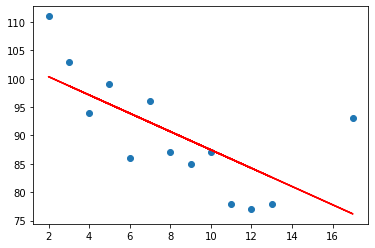

Coefficient: 0.1905457930324339
b0, intercept/tengelymetszet: 103.5798776342624
b1, meredekség/slope: [-1.6125085]


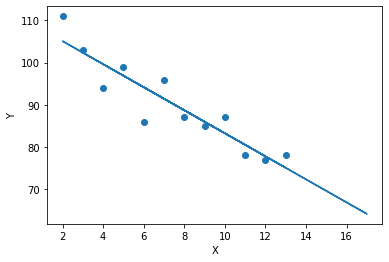

[66.87179487 80.52564103]


In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x = np.array([5,7,8,13,2,17,3,10,4,11,12,9,6])
y = np.array([99,96,87,78,111,93,103,87,94,78,77,85,86])

# Tömb átalakítása oszlopvektorráa vagy sorvektorrá
x = x.reshape(-1, 1)

# Lineáris regresszió
model = LinearRegression()
model.fit(x, y)

# Coefficient, fasztudja mi ez
r_sq = model.score(x, y)
print('Coefficient:',r_sq)

# Tengelymetszet és meredekség
print("b0, intercept/tengelymetszet:", model.intercept_)
print("b1, meredekség/slope:", model.coef_)

# Regressziós vonal ábrázolása az adathalmazon
m = model.coef_
b = model.intercept_

plt.scatter(x, y) # Adathalmaz
plt.plot(x, m*x + b, color='red') # Regressziós vonal
plt.show()

# Kiugró érték kitörlése. Manuálisan keresd meg a tömbben a megfelelő indexet előbb.
x_new = np.delete(x, 5, 0) #x tömbből, 5. elemet, és 0 == flatten
y_new = np.delete(y, 5, 0)

# Lineáris regresszió kiugró érték nélkül
model2 = LinearRegression()
model2.fit(x_new, y_new)
print('Coefficient:', model2.score(x, y))
print("b0, intercept/tengelymetszet:", model.intercept_)
print("b1, meredekség/slope:", model.coef_)
m = model2.coef_
b = model2.intercept_

plt.scatter(x_new, y_new)
plt.plot(x, m * x + b)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Adat predictálása és teszt
newdata = np.array([16, 11]).reshape(-1, 1) 
y_pred = model2.predict(newdata)
print(y_pred)


Logisztikus regresszió

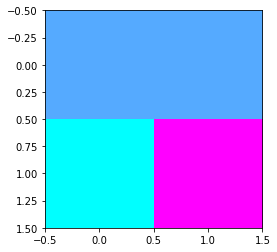

Accuracy:  0.8


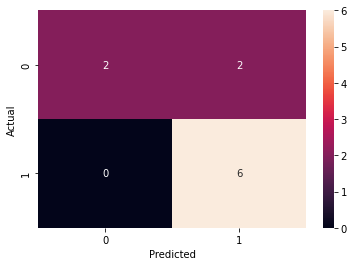

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
df.head()

# Függő (X) és független (y) válotzók elkülönítése.
X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']

# Logisztikus regresszió tanítás
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Konfúziós mátrix (teszt, predikció, X oldal labelje/neve, Y oldal labelje/neve)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Konfúziós mátrix (heatmap) kirajzolása (adathalmaz, hőkép színpalettája, interpoláció fajta)
# Enyém
plt.imshow(confusion_matrix, cmap='cool', interpolation='nearest')
plt.show()
# Hivatalos
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)) # Pontosság



In [3]:
# Tesztelés
new_candidates = {'gmat': [590,740,680,610,710],
                  'gpa': [2,3.7,3.3,2.3,3],
                  'work_experience': [3,4,6,1,5]
                  }
df2 = pd.DataFrame(new_candidates,columns= ['gmat', 'gpa','work_experience'])
y_pred = lr.predict(df2)
print (df2)
print ('prediction: ' , y_pred)

   gmat  gpa  work_experience
0   590  2.0                3
1   740  3.7                4
2   680  3.3                6
3   610  2.3                1
4   710  3.0                5
prediction:  [0 1 1 0 1]


### 6. hét: Decision Tree, Bagging, Random Forest

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
dataset = pd.read_csv(url, names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])

# X és Y adatok kinyerése. Values a dataframe-t numpy array-é alakítja
X = dataset.iloc[:, 2:].values # Összes sor, 2-es oszlopindextől az összes oszlop
Y = dataset.iloc[:, 1].values # Összes sor, 1-es oszlopindex

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 69)


Pontosság: 0.9300699300699301


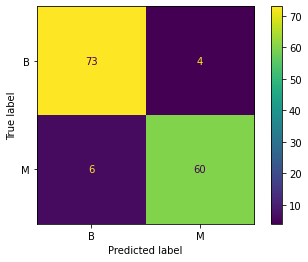

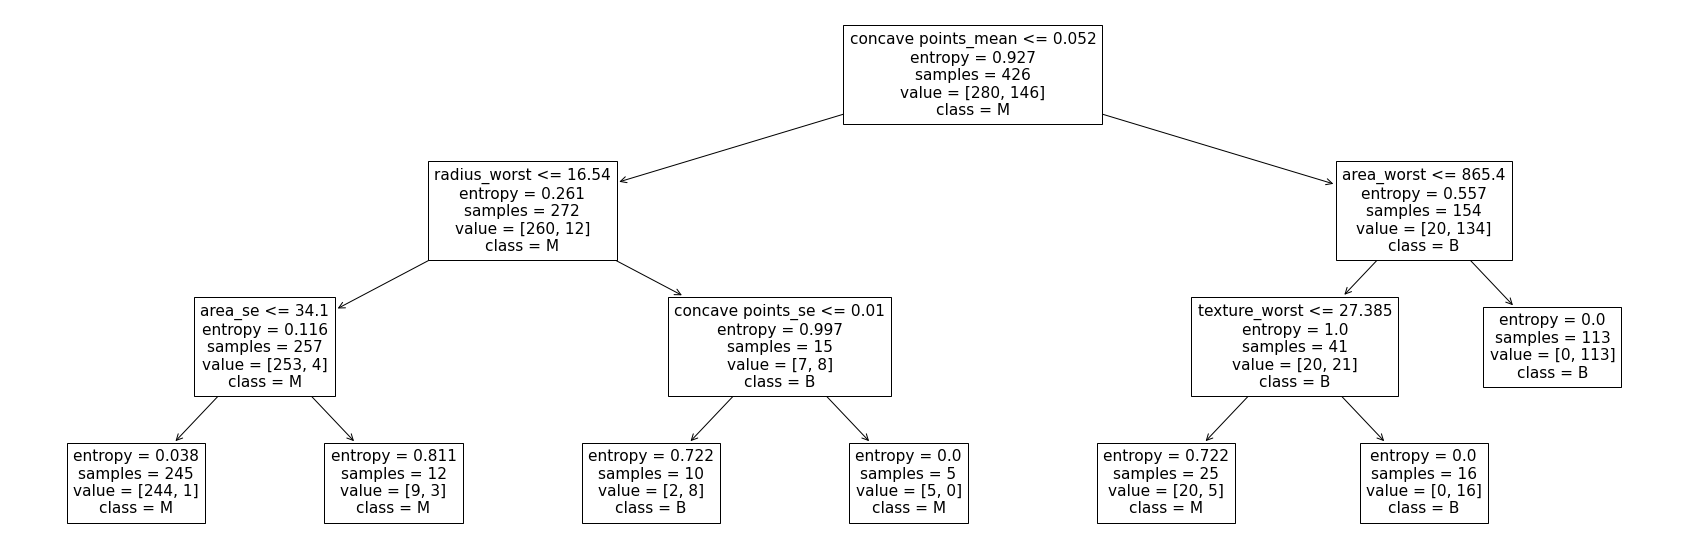

In [5]:
# Decision Tree tanítása (criterion: 'gini' (alap) vagy 'entropy', max_depth: maximum mélység)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3, random_state = 69)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# Konfúziós mátrix kiírása és pontossság
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

confusionMatrix = confusion_matrix(Y_test, Y_pred)
print("Pontosság:",accuracy_score(Y_test, Y_pred))
plot_confusion_matrix(model, X_test, Y_test)

# Decision Tree vizualizálás
from sklearn.tree import plot_tree

plt.figure(figsize=(30,10)) # 30*10-es méret
plot_tree(model,feature_names=dataset.columns[2:], class_names=["M", "B"]) # Elnevezésre van a feature_names és class_names
plt.show()

Bagging

In [6]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=69)

# Bagging-es DCT tanítás és értékelés
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=69)
model.fit(X_train, Y_train)
print('Pontosság:',model.score(X_test, Y_test)) # Igazából a model.score() ugyanazt adja ki, mint az accuracy_score

# Cross validation
from sklearn.model_selection import cross_val_score
results = cross_val_score(model, X, Y, cv=10) # Modell, X, Y, hány db értékelés legyen 
print('Cross val:', results.mean()) # Ez reálisabb eredményt ad, mert 10-nek az átlaga lesz


Pontosság: 0.7922077922077922
Cross val: 0.7668831168831169


Random Forest

In [7]:
# Random Forest kicsit gyorsabb
from sklearn.ensemble import RandomForestClassifier
# n_estimators=DecisionTree darabszám, random_state=69, max_features=maximum hány függő oszlopa lehet?
model = RandomForestClassifier(n_estimators=100, random_state=69, max_features=3)
model.fit(X_train, Y_train)
print('Pontosság:',model.score(X_test, Y_test))

# Cross Validation
results = cross_val_score(model, X, Y, cv=10)
print('Cross val:', results.mean())

Pontosság: 0.7792207792207793
Cross val: 0.7590225563909774


#### 7. hét: Boosting/Ensemble: AdaBoost, Stochastic Gradient Boosting ; SVM

In [8]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values # dataframe numpy array-é alakítása
X = array[:,0:8] # összes sor, 8-as oszlopindexig
Y = array[:,8]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

AdaBoost

In [9]:
from sklearn import ensemble
from sklearn import metrics

# base_estimator alapból DCT-t használ 1-es mélységgel, n_estimators=X db DCT modell
model = ensemble.AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3)
    ,n_estimators=30, random_state=69)
# Evaulate the model using the 10-fold cross validation: results
results = model_selection.cross_val_score(model, X, Y, cv=10) # scoring='f1'-nél csak 54% volt kb
print('Pontosság cross_val:', results.mean())
# Tradicionális pontosság számítás
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print('Pontosság accuracy_score:', metrics.accuracy_score(Y_test, Y_pred))

Pontosság cross_val: 0.7070232399179768
Pontosság accuracy_score: 0.6875


Stochastic Gradient Boosting

In [10]:
# n_estimators: X db DCT modell
model = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=69)
# Evaulate the model using the 10-fold cross validation: results
results = model_selection.cross_val_score(model, X, Y, cv=10)
print('Pontosság cross_val:',results.mean())
# Tradicionális
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print('Pontosság accuracy_score:',metrics.accuracy_score(Y_test, Y_pred))
print('Pontosság score:',model.score(X_test, Y_test))

Pontosság cross_val: 0.7617053998632947
Pontosság accuracy_score: 0.7916666666666666
Pontosság score: 0.7916666666666666


Voting Ensemble (VotingClassifier, modell kombináló)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Ebben tároljuk a különböző modelleket. 
estimators = []
# Logisztikus regresszió: solver: {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, default='lbfgs'
model1 = LogisticRegression(solver='newton-cg',random_state=69)
# Tuple formátumban kell feltölteni a tömböt, mert így jó csak a VotingClassifier ('logistic', model1)
estimators.append(('logistic', model1))
# Create a decision tree model: model2
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=69)
# Tuple formátumban kell feltölteni a tömböt ('decision_tree', model2)
estimators.append(('decision_tree', model2))
# Create an Support Vector Classifier model: model3
model3 = SVC(gamma='auto')
# Tuple formátumban kell feltölteni a tömböt ('svm', model3)
estimators.append(('svm', model3))

# A VotingClassifier-be kell bele tenni a tuple formátumokat 
ensembleVC = VotingClassifier(estimators=estimators) # Csak tuple formátumot fogad el
results = model_selection.cross_val_score(ensembleVC, X, Y, cv=10)
print('Pontosság cross_val:',results.mean())
# Tradicionális
ensembleVC.fit(X_train, Y_train)
print('Pontosság score:',model.score(X_test, Y_test))


Pontosság cross_val: 0.7630724538619276
Pontosság score: 0.7916666666666666


SVM: Support Vector Machines (SVC)

In [12]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

print('Features labels:', cancer.feature_names) # Függő/Feature oszlopnevek
print('Target labels:', cancer.target_names) # Cél/Target oszlopnevek

X = cancer.data
Y = cancer.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=69)

# SVM betanítása és predictálás
# Kernel: Átalakítja az adathalmazt, hogy tudjon vonalat tenni, 
        # amivel majd szétválaszthatjuk az adathalmazt több részre.
        # A lineáris kernel van a képeken, pl a margós képen      
# Reguralization: Ezzel határozzuk meg, hogy mennyire durván büntessünk grr~
# Gamma: Alacsonyabb gamma érték inkább alultanít, magasabb meg túltanit. Arany középút
clf = SVC(kernel='linear', gamma='auto', random_state=69)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

# Különböző pontosság mérések
# Szimpla pontosság
print('Pontosság accuracy_score:', metrics.accuracy_score(Y_test, Y_pred))
# Amiket pozitívnak tippelt, azoknak hány százaléka volt ténylegesen pozitív
print('Pontosság precision_score:', metrics.precision_score(Y_test, Y_pred))
# A pozitív adatok hány százaléka volt pozitívnak megcímkézve
print('Pontosság recall_score:', metrics.recall_score(Y_test, Y_pred))

Features labels: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target labels: ['malignant' 'benign']
Pontosság accuracy_score: 0.9385964912280702
Pontosság precision_score: 0.9206349206349206
Pontosság recall_score: 0.9666666666666667


SVM hiperparaméterek, GridSearchCV

In [13]:
# Kernel: Átalakítja az adathalmazt, hogy tudjon vonalat tenni, 
        # amivel majd szétválaszthatjuk az adathalmazt több részre.
        # A lineáris kernel van a képeken, pl a margós képen      
# Reguralization: Ezzel határozzuk meg, hogy mennyire durván büntessünk grr~
# Gamma: Alacsonyabb gamma érték inkább alultanít, magasabb meg túltanit. Arany középút
from sklearn.model_selection import GridSearchCV
# Hiperparaméterek meghatározása. Több adattal dolgozunk, hogy majd a legjobb kombót megkapjuk
param_grid = {'C': [0.1, 1, 10, 100, 1000],
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf']}
# GridSearchCV a param_grid-ben a kernel, gamma, C sorok összes kombinációját lefuttatja
# verbose: 1 -> számítási időt kiírja, 2 -> idő + pontosság, 3 -> idő + pontosság + paraméter indexek stb.
grid = model_selection.GridSearchCV(SVC(), param_grid, verbose=1)
grid.fit(X_train, Y_train)
# Legjobb paraméter kiírása
print('Legjobb paraméter:',grid.best_params_)

# Legjobb paraméterrel dolgozás
grid_predictions = SVC(kernel='rbf', C=1, gamma=0.0001)
grid_predictions.fit(X_train, Y_train)
Y_pred = grid_predictions.predict(X_test)
print('Predictek:', Y_pred)

# Különböző pontosságok
print('Pontosság accuracy_score', metrics.accuracy_score(Y_test, Y_pred))
print('Pontosság precision_score', metrics.precision_score(Y_test, Y_pred))
print('Pontosság recall_score', metrics.recall_score(Y_test, Y_pred))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Legjobb paraméter: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
Predictek: [0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1
 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1
 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0
 1 1 1]
Pontosság accuracy_score 0.9210526315789473
Pontosság precision_score 0.9047619047619048
Pontosság recall_score 0.95


#### 9. hét: Clustering

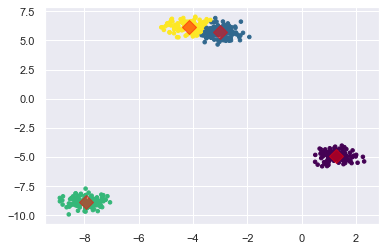

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets

make_blobs = datasets.make_blobs
# Készítünk egy random adathalmazt
X, y_true = make_blobs(n_samples=500, centers = 4, cluster_std=0.40, random_state=69)

# Kmeans algoritmus betanítása ás kiplottolás
from sklearn.model_selection import train_test_split
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Adatok
plt.scatter(X[:,0], X[:,1], marker='.', c=y_kmeans, s=50, cmap='viridis')
# Középpontok
plt.scatter(centers[:,0], centers[:,1], marker='D', color='red', s=100, cmap='viridis', alpha=0.5)
plt.show()

Gaussian Mixture Modell

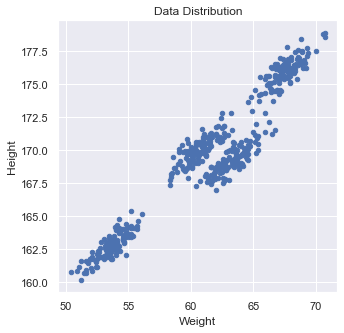

        Weight      Height
0    67.062924  176.086355
1    68.804094  178.388669
2    60.930863  170.284496
3    59.733843  168.691992
4    65.431230  173.763679
..         ...         ...
495  59.976983  169.679741
496  66.423814  174.625574
497  53.604698  161.919208
498  50.433644  160.794875
499  60.224392  169.689709

[500 rows x 2 columns]


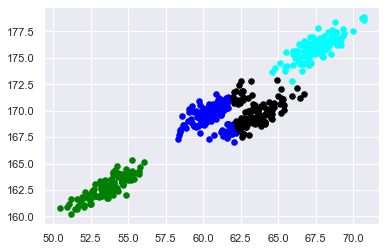

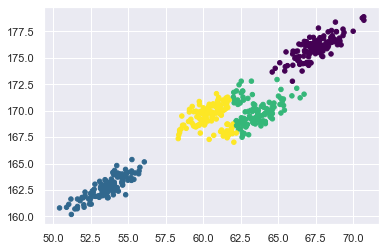

In [20]:
import pandas as pd
data = pd.read_csv('.\HET9\Clustering_gmm.csv')

plt.figure(figsize=(5,5))
plt.scatter(data["Weight"],data["Height"], s=20)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data Distribution')
plt.show()

#training k-means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

#predictions from kmeans
pred = kmeans.predict(data)
frame = pd.DataFrame(data)
print(frame)
frame['cluster'] = pred
frame.columns = ['Weight', 'Height', 'cluster']

#plotting results
color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k], s=30)
plt.show()

data = pd.read_csv('.\HET9\Clustering_gmm.csv')
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
pred = kmeans.predict(data)
plt.scatter(data['Weight'], data['Height'], c = pred, s = 20, cmap = 'viridis')
# show the plot
plt.show()

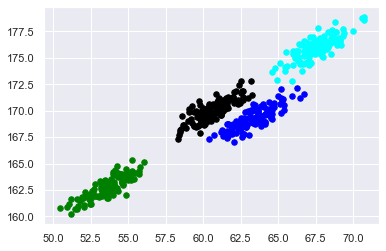

In [22]:
# Gaussian Mixture model betanítása
import pandas as pd
data = pd.read_csv('.\HET9\Clustering_gmm.csv')

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4) # n_components: Hány részre bont
gmm.fit(data)

#predictions from gmm
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

# Kiszínezés
color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k], s=30)
plt.show()
